# Deep Learning Bootcamp November 2017, GPU Computing for Data Scientists

<img src="../images/bcamp.png" align="center">

## 69-PyTorch-Kaggle-porto-driver

Web: https://www.meetup.com/Tel-Aviv-Deep-Learning-Bootcamp/events/241762893/

Notebooks: <a href="https://github.com/QuantScientist/Data-Science-PyCUDA-GPU"> On GitHub</a>

*Shlomo Kashani*

<img src="../images/pt.jpg" width="35%" align="center">


### Data
- Download from 

# PyTorch Imports


In [1]:
# !pip install pycuda
%reset -f

import torch
from torch.autograd import Variable
import numpy as np
import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import logging
import numpy
import numpy as np
from __future__ import print_function
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from sklearn.preprocessing import MultiLabelBinarizer
import time
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import scipy
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots
import tensorflow as tf 
print("tensorflow:" + tf.__version__)
!set "KERAS_BACKEND=tensorflow"
import torch
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# print('__CUDNN VERSION:', torch.backends.cudnn.lib.cudnnGetErrorString())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')

# !pip install http://download.pytorch.org/whl/cu75/torch-0.2.0.post1-cp27-cp27mu-manylinux1_x86_64.whl
# !pip install torchvision 
# ! pip install cv2
# import cv2

print("OS: ", sys.platform)
print("Python: ", sys.version)
print("PyTorch: ", torch.__version__)
print("Numpy: ", np.__version__)

handler=logging.basicConfig(level=logging.INFO)
lgr = logging.getLogger(__name__)
%matplotlib inline

# !pip install psutil
import psutil

import torch
import gc

def memReport():
    for obj in gc.get_objects():
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size())
    
def cpuStats():
        print(sys.version)
        print(psutil.cpu_percent())
        print(psutil.virtual_memory())  # physical memory usage
        pid = os.getpid()
        py = psutil.Process(pid)
        memoryUse = py.memory_info()[0] / 2. ** 30  # memory use in GB...I think
        print('memory GB:', memoryUse)

cpuStats()
# memReport()

# %%timeit
use_cuda = torch.cuda.is_available()
# use_cuda = False

FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor


# use_cuda=False
lgr.info("USE CUDA=" + str (use_cuda))

c:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


tensorflow:1.3.0
__Python VERSION: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
__pyTorch VERSION: 0.2.1+a4fc05a
__CUDA VERSION
__Number CUDA Devices: 1
__Devices
OS:  win32
Python:  3.6.2 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
PyTorch:  0.2.1+a4fc05a
Numpy:  1.13.3
3.6.2 |Anaconda custom (64-bit)| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
0.0
svmem(total=68627443712, available=55183130624, percent=19.6, used=13444313088, free=55183130624)
memory GB: 0.187591552734375


INFO:__main__:USE CUDA=True


#  Global params

In [2]:
# fix seed
seed=17*19
np.random.seed(seed)
torch.manual_seed(seed)
if use_cuda:
    torch.cuda.manual_seed(seed)    
# ! dir    

#  View the Data

In [3]:
import gc; gc.enable()
# !pip install xgboost
import xgboost as xgb
# http://www.lfd.uci.edu/~gohlke/pythonlibs/#xgboost
import pandas as pd
import numpy as np
from sklearn import *
import sklearn

# Data params
TARGET_VAR= 'target'
BASE_FOLDER = 'd:/db/data/porto/'

# Read in our input data
df_train = pd.read_csv(BASE_FOLDER + '/train.csv')
df_test = pd.read_csv(BASE_FOLDER + '/test.csv')
# This prints out (rows, columns) in each dataframe
print('Train shape:', df_train.shape)
print('Test shape:', df_test.shape)

print('Columns:', df_train.columns)

# y_train = df_train['target'].values
# id_train = df_train['id'].values
# id_test = df_test['id'].values
df_train.head()

c:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
c:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Train shape: (595212, 59)
Test shape: (892816, 58)
Columns: Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'p

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
# from rgf.sklearn import RGFClassifier     # https://github.com/fukatani/rgf_python

train = df_train
test = df_test

# Preprocessing (Forza Baseline)
id_test = test['id'].values

col = [c for c in train.columns if c not in ['id','target']]
col = [c for c in col if not c.startswith('ps_calc_')]

train = train.replace(-1, np.NaN)
d_median = train.median(axis=0)
d_mean = train.mean(axis=0)
train = train.fillna(-1)
one_hot = {c: list(train[c].unique()) for c in train.columns if c not in ['id','target']}


def transform(df):
    df = pd.DataFrame(df)
    dcol = [c for c in df.columns if c not in ['id','target']]
    df['ps_car_13_x_ps_reg_03'] = df['ps_car_13'] * df['ps_reg_03']
    df['negative_one_vals'] = np.sum((df[dcol]==-1).values, axis=1)
    for c in dcol:
        if '_bin' not in c:
            df[c+str('_median_range')] = (df[c].values > d_median[c]).astype(np.int)
            df[c+str('_mean_range')] = (df[c].values > d_mean[c]).astype(np.int)

    for c in one_hot:
        if len(one_hot[c])>2 and len(one_hot[c]) < 7:
            for val in one_hot[c]:
                df[c+'_oh_' + str(val)] = (df[c].values == val).astype(np.int)
    return df


train = transform(train)
test = transform(test)

col = [c for c in train.columns if c not in ['id','target']]
col = [c for c in col if not c.startswith('ps_calc_')]

dups = train[train.duplicated(subset=col, keep=False)]

train = train[~(train['id'].isin(dups['id'].values))]

y_train = train['target'].values
id_train = train['id'].values
id_test = test['id'].values

target_train = train['target']
train = train[col]
test = test[col]
print(train.values.shape, test.values.shape)


(595200, 130) (892816, 130)


#  Train / Validation / Test Split

In [5]:
x_train = train
x_test = test

# Take a random 20% of the dataset as validation data
trainX, valX, trainY, valY = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)
print('Train samples: {} Validation samples: {}'.format(len(trainX), len(valX)))


# from sklearn.decomposition import PCA
# n_components = 35
# pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(trainX)
# trainX = pca.transform(trainX)


N_FEATURES=trainX.shape[1]

Train samples: 476160 Validation samples: 119040


#  From Numpy to PyTorch GPU tensors

In [6]:
use_cuda = torch.cuda.is_available()
# use_cuda = False


# Convert the np arrays into the correct dimention and type
# Note that BCEloss requires Float in X as well as in y
def XnumpyToTensor(x_data_np):
    x_data_np = np.array(x_data_np, dtype=np.float32)        
    print(x_data_np.shape)
    print(type(x_data_np))

    if use_cuda:
        lgr.info ("Using the GPU")    
        X_tensor = Variable(torch.from_numpy(x_data_np).cuda()) # Note the conversion for pytorch    
    else:
        lgr.info ("Using the CPU")
        X_tensor = Variable(torch.from_numpy(x_data_np)) # Note the conversion for pytorch
    
    print(type(X_tensor.data)) # should be 'torch.cuda.FloatTensor'            
    print((X_tensor.data.shape)) # torch.Size([108405, 29])
    return X_tensor


# Convert the np arrays into the correct dimention and type
# Note that BCEloss requires Float in X as well as in y
def YnumpyToTensor(y_data_np):    
    y_data_np=y_data_np.reshape((y_data_np.shape[0],1)) # Must be reshaped for PyTorch!
    print(y_data_np.shape)
    print(type(y_data_np))

    if use_cuda:
        lgr.info ("Using the GPU")            
    #     Y = Variable(torch.from_numpy(y_data_np).type(torch.LongTensor).cuda())
        Y_tensor = Variable(torch.from_numpy(y_data_np)).type(torch.FloatTensor).cuda()  # BCEloss requires Float        
    else:
        lgr.info ("Using the CPU")        
    #     Y = Variable(torch.squeeze (torch.from_numpy(y_data_np).type(torch.LongTensor)))  #         
        Y_tensor = Variable(torch.from_numpy(y_data_np)).type(torch.FloatTensor)  # BCEloss requires Float        

    print(type(Y_tensor.data)) # should be 'torch.cuda.FloatTensor'
    print(y_data_np.shape)
    print(type(y_data_np))    
    return Y_tensor

In [8]:
# p is the probability of being dropped in PyTorch

# NN params
DROPOUT_PROB = 0.86

LR = 0.005
MOMENTUM= 0.90
dropout = torch.nn.Dropout(p=1 - (DROPOUT_PROB))

lgr.info(dropout)

hiddenLayer1Size=21
hiddenLayer2Size=int(N_FEATURES)

linear1=torch.nn.Linear(N_FEATURES, hiddenLayer1Size, bias=True) 
torch.nn.init.xavier_uniform(linear1.weight)

linear2=torch.nn.Linear(hiddenLayer1Size, N_FEATURES)
torch.nn.init.xavier_uniform(linear2.weight)

linear3=torch.nn.Linear(N_FEATURES, hiddenLayer2Size)
torch.nn.init.xavier_uniform(linear3.weight)

linear4=torch.nn.Linear(hiddenLayer2Size, hiddenLayer2Size)
torch.nn.init.xavier_uniform(linear4.weight)

linear5=torch.nn.Linear(hiddenLayer2Size, N_FEATURES)
torch.nn.init.xavier_uniform(linear5.weight)

linear6=torch.nn.Linear(N_FEATURES, 1)
torch.nn.init.xavier_uniform(linear6.weight)

sigmoid = torch.nn.Sigmoid()
tanh=torch.nn.Tanh()
relu=torch.nn.LeakyReLU()



net = torch.nn.Sequential(linear1,dropout,nn.BatchNorm1d(hiddenLayer1Size),relu,
                          linear2,dropout,relu,
                          linear3,dropout,relu,
                          linear4,dropout,relu,
                          linear5,dropout,relu,
                          linear6,dropout,sigmoid
                          )

# net = torch.nn.Sequential(linear1,relu,nn.BatchNorm1d(hiddenLayer1Size),dropout,
#                           linear2,relu,nn.BatchNorm1d(N_FEATURES),dropout,
#                           linear3,relu,nn.BatchNorm1d(hiddenLayer2Size),dropout,
#                           linear4,relu,nn.BatchNorm1d(hiddenLayer2Size),dropout,
#                           linear5,relu,nn.BatchNorm1d(N_FEATURES),dropout,
#                           linear6,sigmoid
#                           )


lgr.info(net)  # net architecture


optimizer = torch.optim.Adam(net.parameters(), lr=LR,weight_decay=5e-4) #  L2 regularization
loss_func=torch.nn.BCELoss() # Binary cross entropy: http://pytorch.org/docs/nn.html#bceloss

if use_cuda:
    lgr.info ("Using the GPU")    
    net.cuda()
    loss_func.cuda()
#     cudnn.benchmark = True

lgr.info (optimizer)
lgr.info (loss_func)

INFO:__main__:Dropout (p = 0.19999999999999996)
INFO:__main__:Sequential (
  (0): Linear (130 -> 21)
  (1): Dropout (p = 0.19999999999999996)
  (2): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True)
  (3): LeakyReLU (0.01)
  (4): Linear (21 -> 130)
  (5): Dropout (p = 0.19999999999999996)
  (6): LeakyReLU (0.01)
  (7): Linear (130 -> 130)
  (8): Dropout (p = 0.19999999999999996)
  (9): LeakyReLU (0.01)
  (10): Linear (130 -> 130)
  (11): Dropout (p = 0.19999999999999996)
  (12): LeakyReLU (0.01)
  (13): Linear (130 -> 130)
  (14): Dropout (p = 0.19999999999999996)
  (15): LeakyReLU (0.01)
  (16): Linear (130 -> 1)
  (17): Dropout (p = 0.19999999999999996)
  (18): Sigmoid ()
)
INFO:__main__:Using the GPU
INFO:__main__:<torch.optim.adam.Adam object at 0x000001B0BDBE3160>
INFO:__main__:BCELoss (
)


# Training set

Sequential (
  (0): Linear (130 -> 21)
  (1): Dropout (p = 0.19999999999999996)
  (2): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True)
  (3): LeakyReLU (0.01)
  (4): Linear (21 -> 130)
  (5): Dropout (p = 0.19999999999999996)
  (6): LeakyReLU (0.01)
  (7): Linear (130 -> 130)
  (8): Dropout (p = 0.19999999999999996)
  (9): LeakyReLU (0.01)
  (10): Linear (130 -> 130)
  (11): Dropout (p = 0.19999999999999996)
  (12): LeakyReLU (0.01)
  (13): Linear (130 -> 130)
  (14): Dropout (p = 0.19999999999999996)
  (15): LeakyReLU (0.01)
  (16): Linear (130 -> 1)
  (17): Dropout (p = 0.19999999999999996)
  (18): Sigmoid ()
)
(476160, 130)
<class 'numpy.ndarray'>


INFO:__main__:Using the GPU


<class 'torch.cuda.FloatTensor'>
torch.Size([476160, 130])
(476160, 1)
<class 'numpy.ndarray'>


INFO:__main__:Using the GPU


<class 'torch.cuda.FloatTensor'>
(476160, 1)
<class 'numpy.ndarray'>
<class 'torch.cuda.FloatTensor'> <class 'torch.cuda.FloatTensor'>
0 [ 0.65977103]
LOG_LOSS=0.4217815667180681, ROC_AUC=0.49413109397809896, GINI=-0.011737812043802087
50 [ 0.26493379]
LOG_LOSS=0.26484527377533545, ROC_AUC=0.540493500560314, GINI=0.08098700112062795
100 [ 0.26208699]
LOG_LOSS=0.2620735622642977, ROC_AUC=0.5707264046581059, GINI=0.14145280931621174
150 [ 0.26225755]
LOG_LOSS=0.26090417040638814, ROC_AUC=0.5750960647933159, GINI=0.15019212958663175
200 [ 0.26154369]
LOG_LOSS=0.26119883022000273, ROC_AUC=0.57581664214076, GINI=0.15163328428152
250 [ 0.26013499]
LOG_LOSS=0.2614647443250193, ROC_AUC=0.578557117145809, GINI=0.15711423429161808
300 [ 0.26109704]
LOG_LOSS=0.261769286670444, ROC_AUC=0.5760314921520893, GINI=0.15206298430417853
350 [ 0.26100361]
LOG_LOSS=0.26128311420169353, ROC_AUC=0.5822616564731699, GINI=0.1645233129463397
400 [ 0.26180708]
LOG_LOSS=0.26071851911175115, ROC_AUC=0.580178645127

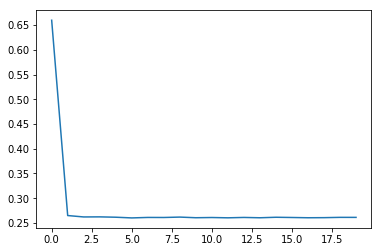

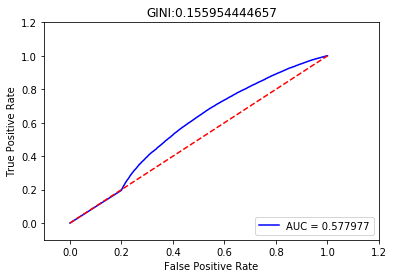

In [9]:
from __future__ import division

import time
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split

# for windows
torch.backends.cudnn.enabled=False

start_time = time.time()    
epochs=1500 # change to 2000 for better results
div_factor=50
all_losses = []
loss_arr =[]
DEBUG_ON=False

print (net)



X_tensor_train= XnumpyToTensor(trainX)
Y_tensor_train= YnumpyToTensor(trainY)
print(type(X_tensor_train.data), type(Y_tensor_train.data)) # should be 'torch.cuda.FloatTensor'

# CUDNN_STATUS_NOT_SUPPORTED. This error may appear if you passed in a non-contiguous input.
# X_tensor_train=X_tensor_train.contiguous()
# Y_tensor_train=Y_tensor_train.contiguous()
                
# From here onwards, we must only use PyTorch Tensors
for step in range(epochs):    
    out = net(X_tensor_train)                 # input x and predict based on x
    cost = loss_func(out, Y_tensor_train)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    cost.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
                   
        
    if step % div_factor == 0:        
        loss = cost.data[0]
        all_losses.append(loss)
        print(step, cost.data.cpu().numpy())
        # RuntimeError: can't convert CUDA tensor to numpy (it doesn't support GPU arrays). 
        # Use .cpu() to move the tensor to host memory first.        
        prediction = (net(X_tensor_train).data).float() # probabilities         
#         prediction = (net(X_tensor).data > 0.5).float() # zero or one
#         print ("Pred:" + str (prediction)) # Pred:Variable containing: 0 or 1
#         pred_y = prediction.data.numpy().squeeze()            
        pred_y = prediction.cpu().numpy().squeeze()
        target_y = Y_tensor_train.cpu().data.numpy()
                        
        tu = (log_loss(target_y, pred_y),roc_auc_score(target_y,pred_y ), 2*roc_auc_score(target_y,pred_y ) - 1)
        print ('LOG_LOSS={}, ROC_AUC={}, GINI={}'.format(*tu))  
        
        loss_arr.append(cost.cpu().data.numpy()[0])
                
end_time = time.time()
print ('{} {:6.3f} seconds'.format('GPU:', end_time-start_time))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.show()

false_positive_rate, true_positive_rate, thresholds = roc_curve(target_y,pred_y)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('GINI:' + str(2*roc_auc_score(target_y,pred_y ) - 1))
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.6f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


(119040, 130)
(119040,)
(119040, 130)
<class 'numpy.ndarray'>


INFO:__main__:Using the GPU


<class 'torch.cuda.FloatTensor'>
torch.Size([119040, 130])
(119040, 1)
<class 'numpy.ndarray'>


INFO:__main__:Using the GPU


<class 'torch.cuda.FloatTensor'>
(119040, 1)
<class 'numpy.ndarray'>
<class 'torch.cuda.FloatTensor'> <class 'torch.cuda.FloatTensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


LOG_LOSS=0.16385383917399313, ROC_AUC=0.6362094820603775, GINI=0.27241896412075506


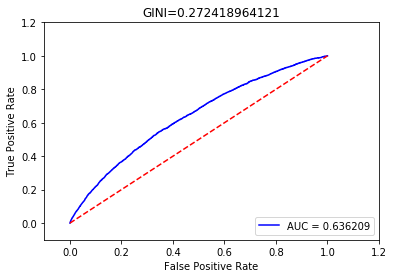

In [10]:
net.eval()
# Validation data

# trainX, valX, trainY, valY = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

print (valX.shape)
print (valY.shape)

# trainX, valX, trainY, valY = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)
# pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(valX)
# valX = pca.transform(valX)

X_tensor_val= XnumpyToTensor(valX)
Y_tensor_val= YnumpyToTensor(valY)


print(type(X_tensor_val.data), type(Y_tensor_val.data)) # should be 'torch.cuda.FloatTensor'

predicted_val = (net(X_tensor_val).data).float() # probabilities 
# predicted_val = (net(X_tensor_val).data > 0.5).float() # zero or one
pred_y = predicted_val.cpu().numpy()
target_y = Y_tensor_val.cpu().data.numpy()                

print (type(pred_y))
print (type(target_y))


print ('\n')
tu = (log_loss(target_y, pred_y),roc_auc_score(target_y,pred_y ), 2*roc_auc_score(target_y,pred_y ) - 1)
print ('LOG_LOSS={}, ROC_AUC={}, GINI={}'.format(*tu))  
        
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_y,pred_y)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('GINI=' + str(2*roc_auc_score(target_y,pred_y ) - 1))
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.6f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print (pred_y)

In [ ]:
X_df_test = pd.read_csv(BASE_FOLDER + '/test.csv')
print('Test shape:', X_df_test.shape)
print('Columns:', X_df_test.columns)
id_test = X_df_test['id'].values
X_df_test=X_df_test.apply(lambda x: pandas.to_numeric(x, errors='ignore'))


print (X_df_test.shape)
columns = ['id', 'target']
df_pred=pd.DataFrame(data=np.zeros((0,len(columns))), columns=columns)


for index, row in X_df_test.iterrows():
    rwo_no_id=row.drop('id')    
#     print (rwo_no_id.values)    
    x_data_np = np.array(rwo_no_id.values, dtype=np.float32)        
    if use_cuda:
        X_tensor_test = Variable(torch.from_numpy(x_data_np).cuda()) # Note the conversion for pytorch    
    else:
        X_tensor_test = Variable(torch.from_numpy(x_data_np)) # Note the conversion for pytorch
                    
    X_tensor_test=X_tensor_test.view(1, trainX.shape[1]) # does not work with 1d tensors            
    predicted_val = (net(X_tensor_test).data).float() # probabilities     
    p_test =   predicted_val.cpu().numpy().item() # otherwise we get an array, we need a single float
    
    df_pred = df_pred.append({'id':row['id'], 'target':p_test},ignore_index=True)
#     df_pred = df_pred.append({'id':row['id'].astype(int), 'probability':p_test},ignore_index=True)

df_pred.head(5)

In [ ]:
df_pred.id=df_pred.id.astype(int)

def savePred(df_pred, loss):
#     csv_path = 'pred/p_{}_{}_{}.csv'.format(loss, name, (str(time.time())))
    csv_path = 'pred/pred_{}_{}.csv'.format(loss, (str(time.time())))
    df_pred.to_csv(csv_path, columns=('id', 'target'), index=None)
    print (csv_path)
    
savePred (df_pred, str(2*roc_auc_score(target_y,pred_y ) - 1))

In [8]:
use_cuda=False
N_FEATURES=trainX.shape[1]
LR=0.005
X_tensor_train= XnumpyToTensor(trainX) # default order is NBC for a 3d tensor, but we have a 2d tensor
X_shape=X_tensor_train.data.size()

# 21      6            3         108405       21*32=672    torch.Size([108405, 672, 2] n_max_pool1d=1

n_mult_factor=6
n_input= trainX.shape[1]
n_hidden= n_input * n_mult_factor
n_output=1
n_input_rows=trainX.shape[0]
n_cnn_kernel=5
n_padding=3

n_max_pool1d=2

DEBUG_ON=True
def debug(msg, x):
    if DEBUG_ON:
        print (msg + ', (size():' + str (x.size()))
    
class CNNNumerAI(nn.Module):    
    def __init__(self, n_input, n_hidden, n_output,n_cnn_kernel, n_mult_factor, n_padding,n_max_pool1d):
        super(CNNNumerAI, self).__init__()    
        self.n_input=n_input
        self.n_hidden=n_hidden
        self.n_output= n_output 
        self.n_cnn_kernel=n_cnn_kernel
        self.n_mult_factor=n_mult_factor
        self.n_padding=n_padding
        self.n_max_pool1d=n_max_pool1d
        self.n_l1=int((n_mult_factor * self.n_input) * (n_padding + 1) / n_max_pool1d)
                    
        self.features = nn.Sequential( # Mimicking AlexNet 
            torch.nn.Conv1d(self.n_input, self.n_hidden,kernel_size=(self.n_cnn_kernel,), stride=(1,), padding=(self.n_padding,)),                                             
            torch.nn.LeakyReLU(),            
            torch.nn.MaxPool1d(kernel_size=self.n_max_pool1d),
            
#             torch.nn.Conv1d(self.n_hidden,self.n_hidden*2,kernel_size=(self.n_cnn_kernel,), stride=(1,), padding=(self.n_padding,)),                                             
#             torch.nn.LeakyReLU(),            
#             torch.nn.MaxPool1d(kernel_size=self.n_max_pool1d),
            
#             torch.nn.Conv1d(self.n_hidden*2,self.n_hidden*2,kernel_size=(self.n_cnn_kernel,), stride=(1,), padding=(self.n_padding,)),                                             
#             torch.nn.LeakyReLU(),            
#             torch.nn.MaxPool1d(kernel_size=self.n_max_pool1d),                                                
        )   
                        
        hiddenLayer2Size=int(self.n_hidden)      
        
        linear1=torch.nn.Linear(hiddenLayer2Size, 1)
        torch.nn.init.xavier_uniform(linear1.weight)

        dropout = torch.nn.Dropout(p=1 - (0.75))
        relu=torch.nn.LeakyReLU()
        
        self.classifier = torch.nn.Sequential(
                                  linear1,dropout,nn.BatchNorm1d(self.n_output)
#                                   linear2,dropout,relu,
#                                   linear3,dropout,relu,
#                                   linear4,dropout,
#                                     linear1
                                  )                                 
        self.sig=nn.Sigmoid()
                
        
    def forward(self, x):
#         debug('raw',x)   
        varSize=x.data.shape[0] # must be calculated here in forward() since its is a dynamic size                          
        # for CNN  
        x=x.contiguous() 
        x = x.view(varSize,self.n_input,1)
        debug('after view',x)   
        x=self.features(x)
        debug('after CNN',x)   
        # for Linear layer
#         x = x.view(varSize,self.n_l1) 
        x = x.view(varSize,int(self.n_hidden)) 
        debug('after 2nd view',x)                  
        x=self.classifier(x)   
        debug('after self.out',x)   
        x=self.sig(x)
        return x

net = CNNNumerAI(n_input, n_hidden, n_output,n_cnn_kernel, n_mult_factor, n_padding, n_max_pool1d)    
lgr.info(net)

optimizer = torch.optim.Adam(net.parameters(), lr=LR,weight_decay=5e-2) #  L2 regularization
loss_func=torch.nn.BCELoss() # Binary cross entropy: http://pytorch.org/docs/nn.html#bceloss


if use_cuda:
    lgr.info ("Using the GPU")    
    net.cuda()
    loss_func.cuda()
#     cudnn.benchmark = True

lgr.info (optimizer)
lgr.info (loss_func)

b = net(X_tensor_train)
print ('(b.size():' + str (b.size()))



# Only on windows
torch.backends.cudnn.enabled=False


(476169, 57)
<class 'numpy.ndarray'>


INFO:__main__:Using the CPU


<class 'torch.FloatTensor'>
torch.Size([476169, 57])


INFO:__main__:CNNNumerAI (
  (features): Sequential (
    (0): Conv1d(57, 342, kernel_size=(5,), stride=(1,), padding=(3,))
    (1): LeakyReLU (0.01)
    (2): MaxPool1d (size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential (
    (0): Linear (342 -> 1)
    (1): Dropout (p = 0.25)
    (2): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True)
  )
  (sig): Sigmoid ()
)
INFO:__main__:<torch.optim.adam.Adam object at 0x0000016ACFA7D908>
INFO:__main__:BCELoss (
)


after view, (size():torch.Size([476169, 57, 1])
after CNN, (size():torch.Size([476169, 342, 1])
after 2nd view, (size():torch.Size([476169, 342])
after self.out, (size():torch.Size([476169, 1])
(b.size():torch.Size([476169, 1])
